<a href="https://colab.research.google.com/github/SrinijaB-05/SafeStreet-1/blob/main/Bounding_boxes_with_less_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Define your dataset path inside Google Drive
base_path = "/content/drive/MyDrive/Dataset1"
img_dir = os.path.join(base_path, "images")
xml_dir = os.path.join(base_path, "annotations")

# Check paths
assert os.path.exists(img_dir), f"Image folder not found: {img_dir}"
assert os.path.exists(xml_dir), f"Annotation folder not found: {xml_dir}"

print("✅ Image and annotation directories found!")


✅ Image and annotation directories found!


In [ ]:
import xml.etree.ElementTree as ET
from PIL import Image

output_img_dir = "yolo_dataset/images"
output_label_dir = "yolo_dataset/labels"

os.makedirs(output_img_dir, exist_ok=True)
os.makedirs(output_label_dir, exist_ok=True)

classes = ["pothole", "crack"]  # Change based on your dataset
class_to_id = {cls: i for i, cls in enumerate(classes)}

def convert(xml_file, img_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    with Image.open(img_file) as img:
        w, h = img.size

    yolo_data = []

    for obj in root.findall("object"):
        label = obj.find("name").text
        if label not in class_to_id:
            continue
        bbox = obj.find("bndbox")
        x_min = int(bbox.find("xmin").text)
        y_min = int(bbox.find("ymin").text)
        x_max = int(bbox.find("xmax").text)
        y_max = int(bbox.find("ymax").text)

        x_center = (x_min + x_max) / 2 / w
        y_center = (y_min + y_max) / 2 / h
        width = (x_max - x_min) / w
        height = (y_max - y_min) / h

        yolo_data.append(f"{class_to_id[label]} {x_center} {y_center} {width} {height}")

    return yolo_data

# Process all images
import shutil

image_files = [f for f in os.listdir(img_dir) if f.endswith((".jpg", ".png"))]
print(f"Found {len(image_files)} images.")

for fname in image_files:
    img_path = os.path.join(img_dir, fname)
    xml_path = os.path.join(xml_dir, os.path.splitext(fname)[0] + ".xml")

    if not os.path.exists(xml_path):
        print(f"❌ Annotation not found for: {fname}")
        continue

    # Convert annotation
    yolo_data = convert(xml_path, img_path)

    # Save files
    shutil.copy(img_path, os.path.join(output_img_dir, fname))
    with open(os.path.join(output_label_dir, os.path.splitext(fname)[0] + ".txt"), "w") as f:
        f.write("\n".join(yolo_data))

print("✅ Annotation conversion complete.")

Found 665 images.
✅ Annotation conversion complete.


In [ ]:
# ✅ Create data.yaml using Python code
classes = ["pothole", "crack"]  # Update as per your dataset

with open("data.yaml", "w") as f:
    f.write(
        "train: yolo_dataset/images\n"
        "val: yolo_dataset/images\n"
        f"nc: {len(classes)}\n"
        f"names: {classes}\n"
    )

print("✅ data.yaml created.")


✅ data.yaml created.


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.5/983.5 kB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
import os
print(os.getcwd())  # Usually /content

/content


In [ ]:
image_path = os.path.abspath("yolo_dataset/images")

classes = ["pothole", "crack"]

with open("data.yaml", "w") as f:
    f.write(
        f"train: {image_path}\n"
        f"val: {image_path}\n"
        f"nc: {len(classes)}\n"
        f"names: {classes}\n"
    )

print("✅ data.yaml written with full paths.")


✅ data.yaml written with full paths.


In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data="data.yaml", epochs=50, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 222MB/s]


Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torc

100%|██████████| 755k/755k [00:00<00:00, 91.7MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,238 parameters, 3,011,222 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 303MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 83.8±56.9 MB/s, size: 377.0 KB)


train: Scanning /content/yolo_dataset/labels... 665 images, 0 backgrounds, 0 corrupt: 100%|██████████| 665/665 [00:03<00:00, 184.88it/s]

train: New cache created: /content/yolo_dataset/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1503.3±395.6 MB/s, size: 493.0 KB)


val: Scanning /content/yolo_dataset/labels.cache... 665 images, 0 backgrounds, 0 corrupt: 100%|██████████| 665/665 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.05G      1.605      2.718      1.488         52        640: 100%|██████████| 42/42 [00:17<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:12<00:00,  1.71it/s]

                   all        665       1740      0.841      0.204       0.41      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.79G      1.533       1.94      1.406         41        640: 100%|██████████| 42/42 [00:15<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.93it/s]

                   all        665       1740      0.631      0.449      0.506      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       2.8G      1.543      1.821      1.415         45        640: 100%|██████████| 42/42 [00:16<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.89it/s]


                   all        665       1740      0.496       0.41      0.418      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.81G      1.535       1.75      1.437         54        640: 100%|██████████| 42/42 [00:15<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.96it/s]

                   all        665       1740      0.492      0.405      0.428      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.81G      1.491      1.616      1.391         34        640: 100%|██████████| 42/42 [00:15<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.95it/s]


                   all        665       1740      0.448      0.353      0.341      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.81G      1.482      1.587      1.405         40        640: 100%|██████████| 42/42 [00:14<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.08it/s]


                   all        665       1740      0.664      0.601       0.65      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.81G      1.431      1.427      1.346         36        640: 100%|██████████| 42/42 [00:15<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.30it/s]


                   all        665       1740      0.643       0.51      0.575      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.81G      1.404      1.405      1.348         33        640: 100%|██████████| 42/42 [00:15<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.10it/s]

                   all        665       1740      0.697      0.589      0.661      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.82G        1.4      1.391      1.341         42        640: 100%|██████████| 42/42 [00:15<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.96it/s]

                   all        665       1740      0.756      0.631      0.728      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.83G      1.367      1.356      1.345         55        640: 100%|██████████| 42/42 [00:15<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.98it/s]

                   all        665       1740      0.743      0.689      0.754      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.83G       1.38       1.31      1.314         32        640: 100%|██████████| 42/42 [00:15<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.99it/s]

                   all        665       1740      0.714      0.649      0.718      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.83G       1.34       1.27      1.312         49        640: 100%|██████████| 42/42 [00:14<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.11it/s]

                   all        665       1740      0.771      0.698      0.774      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.83G      1.351       1.29      1.301         45        640: 100%|██████████| 42/42 [00:15<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.33it/s]

                   all        665       1740      0.769      0.639      0.757      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.83G      1.326      1.187      1.283         34        640: 100%|██████████| 42/42 [00:14<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.97it/s]

                   all        665       1740      0.805       0.71       0.81      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.83G      1.318      1.171      1.275         53        640: 100%|██████████| 42/42 [00:15<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.94it/s]

                   all        665       1740      0.804      0.712       0.81      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.84G      1.277      1.125      1.262         32        640: 100%|██████████| 42/42 [00:14<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.98it/s]

                   all        665       1740      0.787      0.709      0.807      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.85G      1.286      1.139      1.265         33        640: 100%|██████████| 42/42 [00:14<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.00it/s]

                   all        665       1740      0.788      0.701      0.799      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.86G      1.297      1.148      1.265         36        640: 100%|██████████| 42/42 [00:15<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.26it/s]

                   all        665       1740      0.795      0.696      0.804      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.86G      1.263      1.083       1.24         38        640: 100%|██████████| 42/42 [00:15<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.24it/s]

                   all        665       1740      0.819      0.726      0.832      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.87G      1.263      1.066      1.241         36        640: 100%|██████████| 42/42 [00:14<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.95it/s]

                   all        665       1740       0.83      0.761      0.853      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.88G      1.242      1.044      1.236         39        640: 100%|██████████| 42/42 [00:15<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.95it/s]

                   all        665       1740      0.811       0.76      0.853      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.88G      1.266      1.076      1.241         34        640: 100%|██████████| 42/42 [00:15<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.97it/s]

                   all        665       1740      0.823      0.748      0.848      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.88G       1.21      1.008      1.228         46        640: 100%|██████████| 42/42 [00:14<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.12it/s]

                   all        665       1740      0.834      0.764      0.862      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.88G      1.209      1.014       1.21         44        640: 100%|██████████| 42/42 [00:15<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.33it/s]

                   all        665       1740      0.835      0.782       0.87      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.88G      1.212     0.9941      1.215         50        640: 100%|██████████| 42/42 [00:15<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.09it/s]

                   all        665       1740      0.839       0.79      0.873      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.88G      1.186     0.9622      1.215         42        640: 100%|██████████| 42/42 [00:14<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.96it/s]

                   all        665       1740      0.853       0.78      0.885      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.88G      1.195      0.967      1.203         38        640: 100%|██████████| 42/42 [00:15<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.98it/s]

                   all        665       1740      0.868      0.778      0.886      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.88G      1.157     0.9815      1.182         30        640: 100%|██████████| 42/42 [00:15<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.97it/s]

                   all        665       1740      0.864      0.809      0.904      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.88G      1.156     0.9358      1.185         30        640: 100%|██████████| 42/42 [00:15<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.15it/s]

                   all        665       1740      0.864      0.824      0.909       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.88G      1.159     0.9416      1.172         45        640: 100%|██████████| 42/42 [00:15<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.22it/s]

                   all        665       1740      0.888      0.826      0.916      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.88G      1.149     0.9222       1.18         31        640: 100%|██████████| 42/42 [00:15<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.98it/s]

                   all        665       1740      0.885      0.825      0.916      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.88G      1.144     0.9146      1.187         35        640: 100%|██████████| 42/42 [00:15<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.99it/s]

                   all        665       1740      0.892      0.816      0.922      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.88G      1.103     0.8692      1.156         48        640: 100%|██████████| 42/42 [00:15<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.98it/s]

                   all        665       1740      0.866      0.841      0.921      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.88G      1.127     0.8639      1.175         61        640: 100%|██████████| 42/42 [00:15<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.99it/s]

                   all        665       1740      0.888      0.842       0.93      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.88G      1.113     0.8663      1.154         56        640: 100%|██████████| 42/42 [00:15<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.20it/s]

                   all        665       1740        0.9      0.848      0.933      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.88G      1.063     0.8259       1.13         28        640: 100%|██████████| 42/42 [00:15<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.21it/s]

                   all        665       1740        0.9      0.862       0.94      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.88G      1.059     0.8148      1.141         28        640: 100%|██████████| 42/42 [00:14<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.94it/s]

                   all        665       1740       0.93      0.835      0.942       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.88G      1.064     0.8094       1.13         41        640: 100%|██████████| 42/42 [00:15<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.99it/s]

                   all        665       1740      0.916      0.864       0.95      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.88G      1.043     0.7861      1.126         43        640: 100%|██████████| 42/42 [00:15<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.01it/s]

                   all        665       1740      0.917      0.874      0.952      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.88G      1.055     0.8063      1.129         37        640: 100%|██████████| 42/42 [00:15<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.23it/s]

                   all        665       1740      0.915      0.882      0.951       0.72


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.88G      1.003     0.7744      1.085         25        640: 100%|██████████| 42/42 [00:16<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.28it/s]

                   all        665       1740      0.918       0.86       0.95      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.88G     0.9552     0.6955      1.064         40        640: 100%|██████████| 42/42 [00:14<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.16it/s]

                   all        665       1740      0.926      0.873      0.958      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.88G     0.9556     0.6822      1.064         23        640: 100%|██████████| 42/42 [00:14<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.97it/s]

                   all        665       1740      0.925      0.895      0.961      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.88G     0.9416     0.6655      1.061         25        640: 100%|██████████| 42/42 [00:14<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.95it/s]

                   all        665       1740      0.931      0.885      0.963      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.88G     0.9216     0.6472      1.035         16        640: 100%|██████████| 42/42 [00:14<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.02it/s]

                   all        665       1740      0.937      0.911       0.97      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.88G     0.8985     0.6232      1.025         19        640: 100%|██████████| 42/42 [00:14<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.40it/s]

                   all        665       1740      0.942      0.907       0.97      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.88G     0.9167     0.6353      1.038         25        640: 100%|██████████| 42/42 [00:15<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.09it/s]

                   all        665       1740       0.95      0.905      0.973       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.88G     0.8858     0.5961      1.021         16        640: 100%|██████████| 42/42 [00:14<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.01it/s]

                   all        665       1740      0.956      0.915      0.976       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.88G     0.8783      0.599      1.024         15        640: 100%|██████████| 42/42 [00:14<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.97it/s]

                   all        665       1740       0.95      0.913      0.976      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.88G     0.8866     0.5967      1.013         23        640: 100%|██████████| 42/42 [00:14<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.19it/s]

                   all        665       1740      0.958      0.912      0.977      0.771



50 epochs completed in 0.361 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.10it/s]


                   all        665       1740      0.956      0.913      0.977      0.771
               pothole        665       1740      0.956      0.913      0.977      0.771
Speed: 0.3ms preprocess, 2.2ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bfaee881250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
# ✅ Save best model to Google Drive after training
trained_model_path = "runs/detect/train/weights/best.pt"
drive_save_path = "/content/drive/MyDrive/trained_models/road_damage_best.pt"

# Create directory in Drive if it doesn't exist
os.makedirs(os.path.dirname(drive_save_path), exist_ok=True)

# Copy trained model to Google Drive
import shutil
shutil.copy(trained_model_path, drive_save_path)

print(f"✅ Model saved to: {drive_save_path}")


✅ Model saved to: /content/drive/MyDrive/trained_models/road_damage_best.pt



image 1/1 /content/drive/MyDrive/Dataset1/images/potholes1.png: 480x640 2 potholes, 34.1ms
Speed: 2.1ms preprocess, 34.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


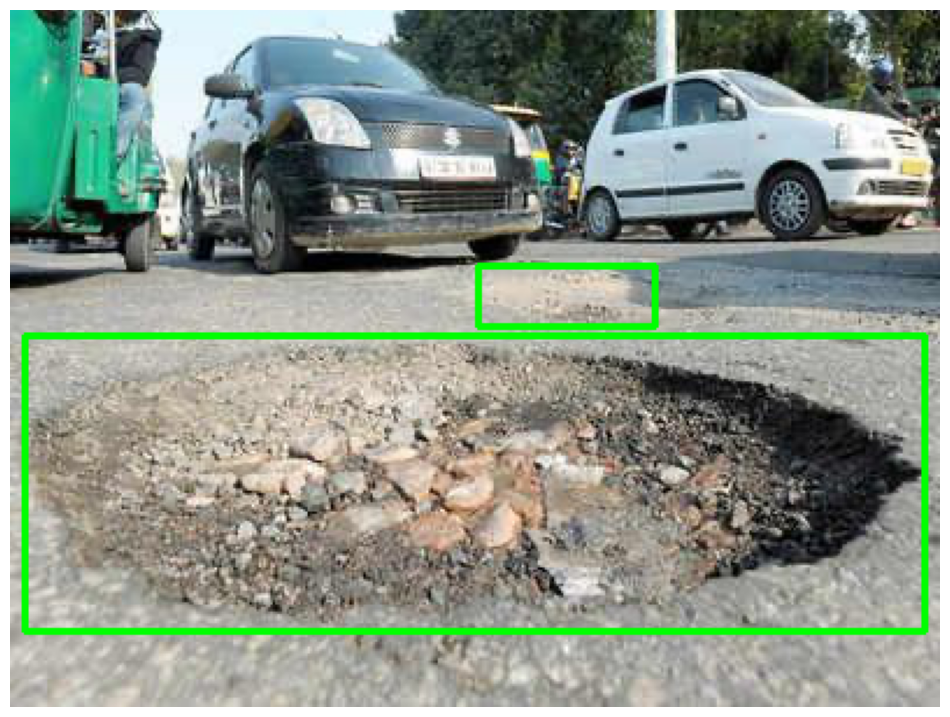

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load trained model from Google Drive
model = YOLO("/content/drive/MyDrive/trained_models/road_damage_best.pt")

# Image path
img_path = "/content/drive/MyDrive/Dataset1/images/potholes1.png"  # Change as needed

# Predict
results = model.predict(source=img_path, conf=0.25)[0]

# Load image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw only green boxes
for box in results.boxes:
    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box with thickness 2

# Show result
plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

Saving 62.jpg to 62.jpg

image 1/1 /content/62.jpg: 352x640 20 potholes, 54.8ms
Speed: 3.1ms preprocess, 54.8ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)


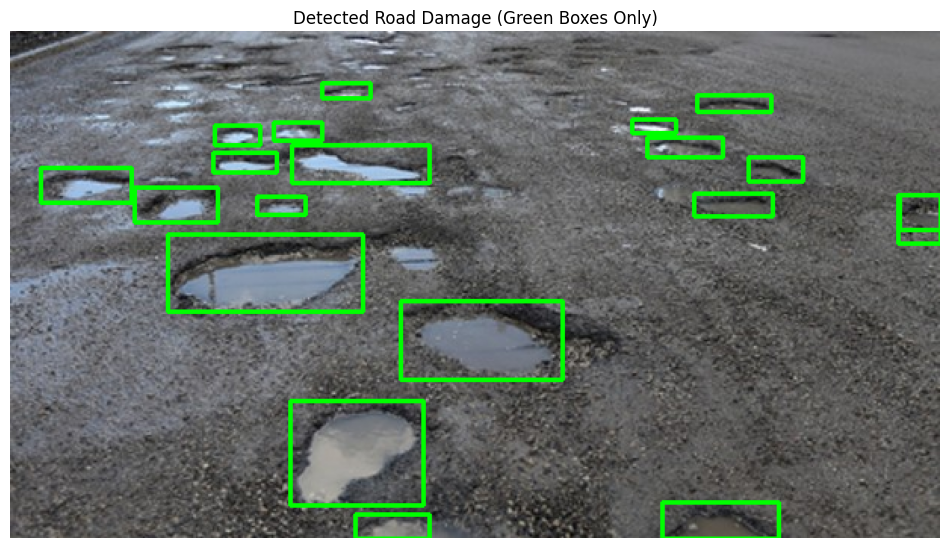

In [ ]:
from google.colab import files
uploaded = files.upload()

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load trained model
#model = YOLO("runs/detect/train/weights/best.pt")  # Adjust path if needed
model = YOLO("/content/drive/MyDrive/trained_models/road_damage_best.pt")

# Use the uploaded image path (run this after you've uploaded using files.upload)
uploaded_img_path = list(uploaded.keys())[0]

# Run detection
results = model.predict(source=uploaded_img_path, conf=0.25)[0]

# Load and convert the image
img = cv2.imread(uploaded_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw only green rectangles around each detected object
for box in results.boxes:
    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box

# Show the result
plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.title("Detected Road Damage (Green Boxes Only)")
plt.show()


image 1/1 /content/drive/MyDrive/Dataset1/images/potholes1.png: 480x640 2 potholes, 9.8ms
Speed: 3.1ms preprocess, 9.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


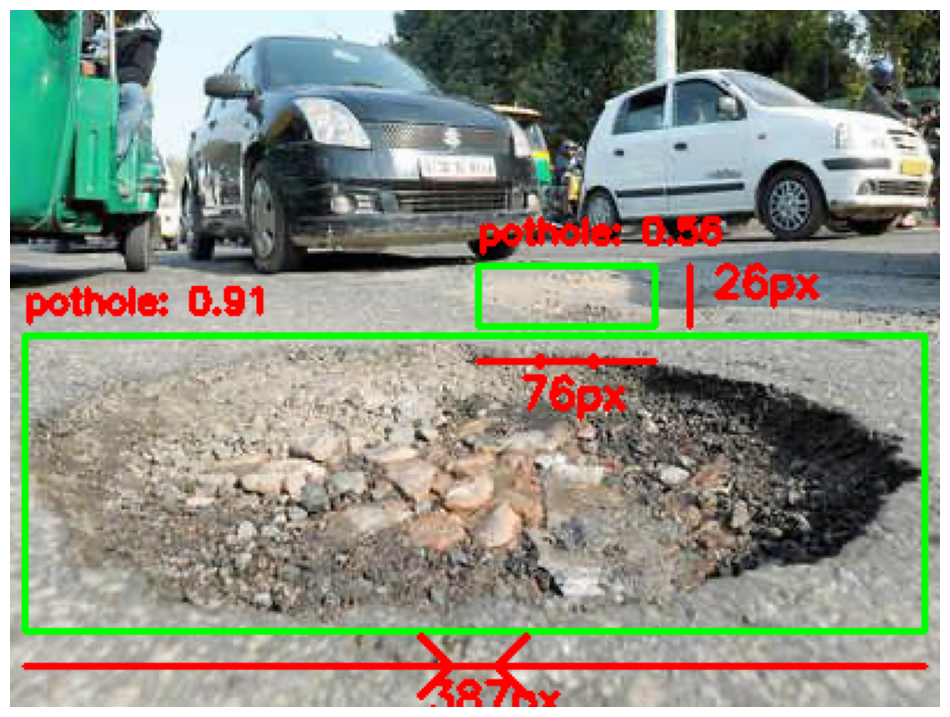

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load your trained model
model = YOLO("runs/detect/train/weights/best.pt")  # Path to your trained model

# Image to predict on
img_path = "/content/drive/MyDrive/Dataset1/images/potholes1.png"  # Change to match your image

# Run inference
results = model.predict(source=img_path, conf=0.25)[0]  # Lower confidence if needed

# Load the image for drawing
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Process each detection
for box in results.boxes:
    # Get box coordinates (XYXY format - [x1, y1, x2, y2])
    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)

    # Calculate width and height
    w = x2 - x1
    h = y2 - y1

    # Draw the rectangle
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box

    # Draw width dimension
    cv2.line(img, (x1, y2 + 15), (x2, y2 + 15), (255, 0, 0), 2)  # Blue line
    cv2.arrowedLine(img, (x1, y2 + 15), (x1 + w//2 - 10, y2 + 15), (255, 0, 0), 2)  # Left arrow
    cv2.arrowedLine(img, (x2, y2 + 15), (x1 + w//2 + 10, y2 + 15), (255, 0, 0), 2)  # Right arrow
    cv2.putText(img, f"{w}px", (x1 + w//2 - 20, y2 + 35), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    # Draw height dimension
    cv2.line(img, (x2 + 15, y1), (x2 + 15, y2), (255, 0, 0), 2)  # Blue line
    cv2.arrowedLine(img, (x2 + 15, y1), (x2 + 15, y1 + h//2 - 10), (255, 0, 0), 2)  # Top arrow
    cv2.arrowedLine(img, (x2 + 15, y2), (x2 + 15, y1 + h//2 + 10), (255, 0, 0), 2)  # Bottom arrow
    cv2.putText(img, f"{h}px", (x2 + 25, y1 + h//2), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    # Optional: Show class and confidence
    cls = int(box.cls)
    conf = float(box.conf)
    label = f"{results.names[cls]}: {conf:.2f}"
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Display the image with bounding boxes and dimensions
plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.show()


image 1/1 /content/drive/MyDrive/Dataset1/images/potholes421.png: 640x640 1 pothole, 9.6ms
Speed: 4.4ms preprocess, 9.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


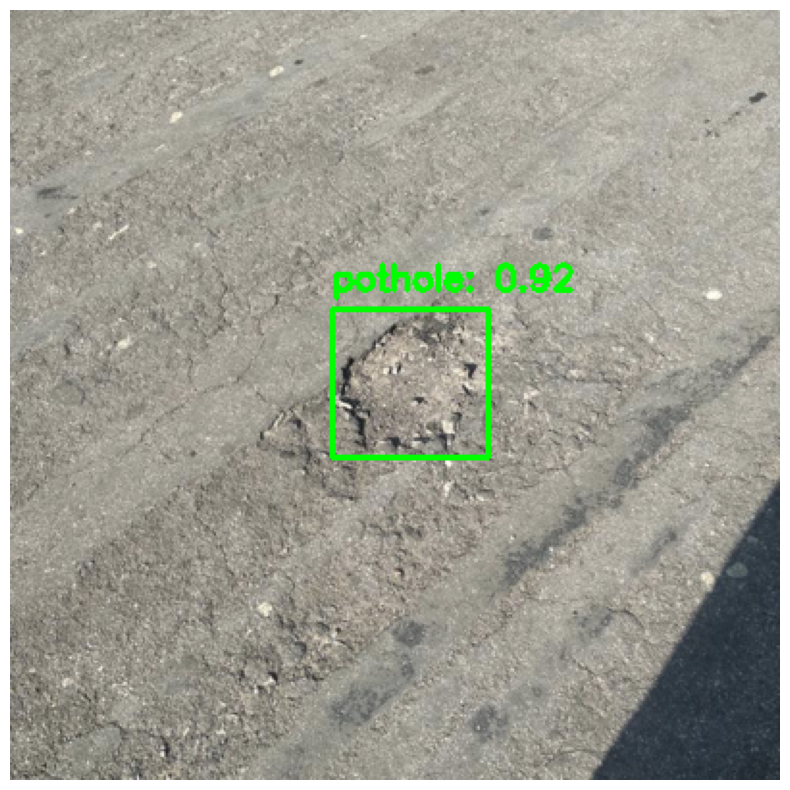

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load your model
model = YOLO("runs/detect/train/weights/best.pt")

# Path to the clean original image
img_path = "/content/drive/MyDrive/Dataset1/images/potholes421.png"

# Run inference
results = model.predict(source=img_path, conf=0.25)[0]

# Load image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw only bounding boxes and class labels
for box in results.boxes:
    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
    cls = int(box.cls)
    conf = float(box.conf)
    label = f"{results.names[cls]}: {conf:.2f}"

    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green bounding box
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Display result
plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.show()


image 1/1 /content/drive/MyDrive/Dataset1/images/potholes294.png: 480x640 18 potholes, 10.0ms
Speed: 3.5ms preprocess, 10.0ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


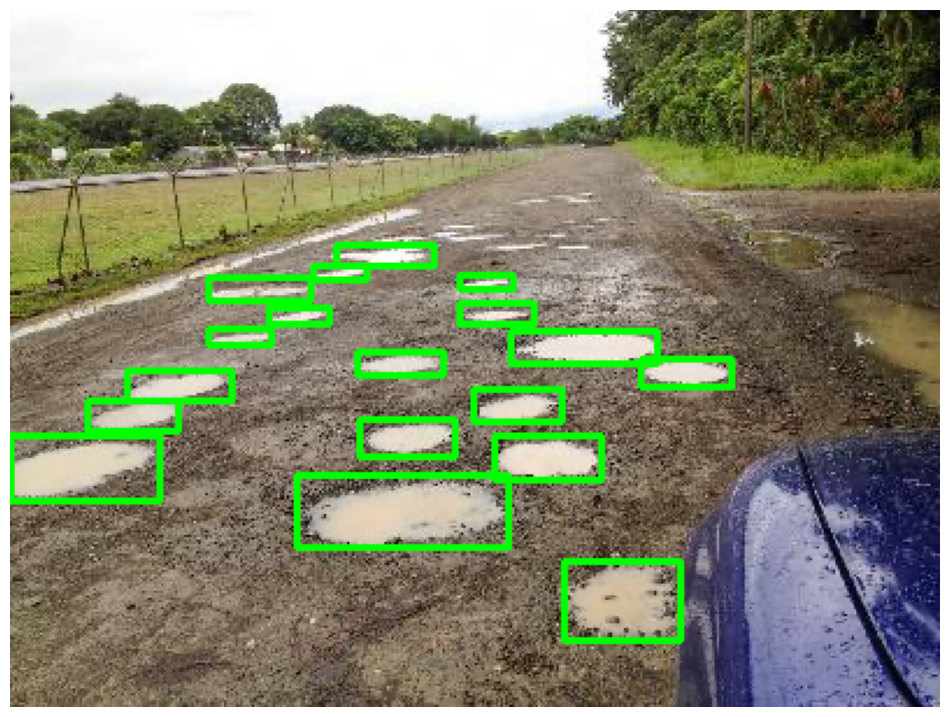

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load your model
model = YOLO("runs/detect/train/weights/best.pt")

# Path to the clean original image
img_path = "/content/drive/MyDrive/Dataset1/images/potholes294.png"

# Run inference
results = model.predict(source=img_path, conf=0.25)[0]

# Load image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw only bounding boxes (no text)
for box in results.boxes:
    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green bounding box

# Display result
plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.show()
